# Einleitung

Dieser Report beschreibt das Data Exploration Projekt, das im Rahmen der Vorlesung durchgeführt wurde. Ziel ist es, durch explorative Datenanalyse und den Einsatz von Machine Learning-Methoden Erkenntnisse aus dem vorgegebenen Datensatz zu gewinnen. Der Code und die Ergebnisse sind in einem GitHub-Repository dokumentiert (https://github.com/laurenziu10/dep) und werden in diesem Jupyter Notebook präsentiert.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.dummy import DummyClassifier
pd.set_option('display.max_columns', 20)

/var/folders/vb/3fgx1mm954q9j0shqmng75q00000gn/T/ipykernel_30092/3546667747.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Datencharakterisierung

## Das Datenset

Der verwendete Datensatz, abrufbar unter dem Kaggle-Link (https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset), umfasst Informationen zu Krankheitssymptomen und Patientenprofilen. Dieser Datensatz enthält eine breite Palette von Merkmalen, die sowohl klinische Symptome als auch demografische Daten von Patienten umfassen. 

Beschreibung der Spalten:

Disease: Der Name der diagnostizierten Krankheit oder des medizinischen Zustands.

Fever: Gibt an, ob der Patient Fieber hat (Yes/No).

Cough: Gibt an, ob der Patient Husten hat (Yes/No).

Fatigue: Gibt an, ob der Patient Müdigkeit erfährt (Yes/No).

Difficulty Breathing: Gibt an, ob der Patient Atemschwierigkeiten hat (Yes/No).

Age: Das Alter des Patienten in Jahren.

Gender: Das Geschlecht des Patienten (Male/Female).

Blood Pressur: Der Blutdruck des Patienten, angegeben als Low, Normal oder High.

Cholesterol Level: Der Cholesterinspiegel des Patienten, angegeben als Low, Normal oder High.

Outcome Variable: Die Ergebnisvariable, die das Resultat der Diagnose oder Bewertung für die spezifische Krankheit anzeigt (Positive/Negative).

In [2]:
# Import dataset
df = pd.read_csv('data/Disease_symptom_and_patient_profile_dataset.csv')
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [3]:
# Overview of the dataset
print("Data overview:")
print(df.info())

Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB
None


Wie man sehen kann, sind alle Spalten, außer die Spalte 'Age' (int64), vom Typ object, also Strings.

In [4]:
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64


Es gibt somit keine fehlenden Werte in einer Spalte.

In [5]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
              Age
count  349.000000
mean    46.323782
std     13.085090
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000


Das Mindestalter der Patienten ist 19 und das Höchstalter ist 90.

In [6]:
# Amount of unique values of each column
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

Es gibt 116 verschiedene Krankheiten und 26 verschiedene Altersgruppen. Die restlichen Spalten sind in die Zustände Yes und No oder Low, Normal und High aufgeteilt.

In [7]:
# Check the number of duplicates
duplicate_count = df.duplicated().sum()
duplicate_count

49

Es gibt 49 Duplikate, die im Folgenden aus dem Datenset entfernt werden.

In [8]:
# Remove duplicates
df_no_duplicates = df.drop_duplicates().reset_index(drop=True)
df_no_duplicates

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
295,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
296,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
297,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
298,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


In [9]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Label encoding for selected categorical columns
categorical_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Outcome Variable'] #0 for female and no, 1 for male and yes
for column in categorical_columns:
    df_no_duplicates[column] = le.fit_transform(df_no_duplicates[column])

# One-hot encoding for 'Blood Pressure' and 'Cholesterol Level'
bp_dummies = pd.get_dummies(df_no_duplicates['Blood Pressure'], prefix='BP', dtype=int)
chol_dummies = pd.get_dummies(df_no_duplicates['Cholesterol Level'], prefix='Cholesterol', dtype=int)

# Adding the new one-hot encoded columns
df_numeric = pd.concat([df_no_duplicates, bp_dummies, chol_dummies], axis=1)

# Display the transformed DataFrame
df_numeric

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,BP_High,BP_Low,BP_Normal,Cholesterol_High,Cholesterol_Low,Cholesterol_Normal
0,Influenza,1,0,1,1,19,0,Low,Normal,1,0,1,0,0,0,1
1,Common Cold,0,1,1,0,25,0,Normal,Normal,0,0,0,1,0,0,1
2,Eczema,0,1,1,0,25,0,Normal,Normal,0,0,0,1,0,0,1
3,Asthma,1,1,0,1,25,1,Normal,Normal,1,0,0,1,0,0,1
4,Eczema,1,0,0,0,25,0,Normal,Normal,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Tonsillitis,1,1,1,0,70,0,High,High,1,1,0,0,1,0,0
296,Williams Syndrome,0,0,1,0,70,0,Normal,Normal,1,0,0,1,0,0,1
297,Stroke,1,0,1,0,80,0,High,High,1,1,0,0,1,0,0
298,Stroke,1,0,1,0,85,1,High,High,1,1,0,0,1,0,0


Alle kategorischen Werte werden in numerische Werte umgewandelt, um später die ML Methode besser anwenden zu können. 0 steht für Female oder No und 1 steht für Male oder Yes.

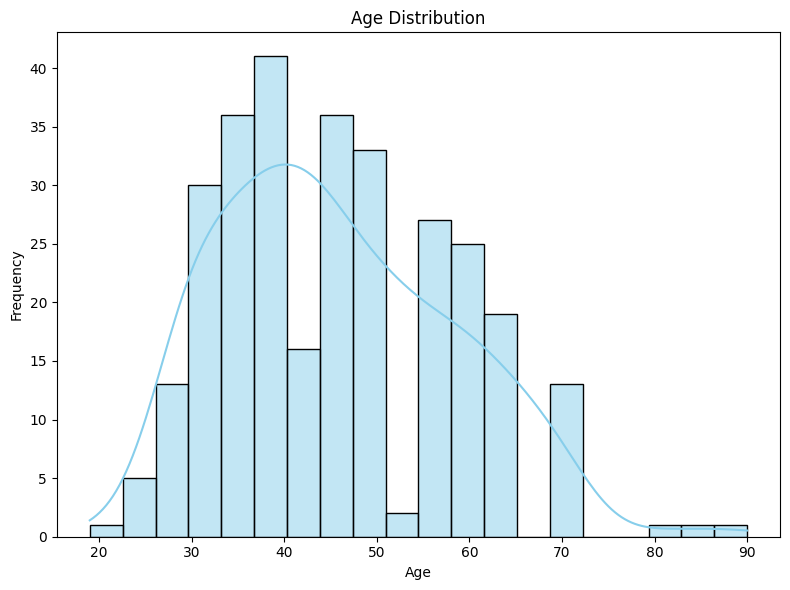

In [10]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_numeric['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
# Identify outliers
outliers = df_numeric[df_numeric['Age'] > 80]


print("Number of outliers: ", outliers.shape[0])
print("Outlier examples:")
print(outliers.head())

Number of outliers:  2
Outlier examples:
    Disease  Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  \
298  Stroke      1      0        1                     0   85       1   
299  Stroke      1      0        1                     0   90       0   

    Blood Pressure Cholesterol Level  Outcome Variable  BP_High  BP_Low  \
298           High              High                 1        1       0   
299           High              High                 1        1       0   

     BP_Normal  Cholesterol_High  Cholesterol_Low  Cholesterol_Normal  
298          0                 1                0                   0  
299          0                 1                0                   0  


Die Ausreißer werden in Betracht auf das Alter ermittelt. Es werden alle Patienten, die älter als 80 Jahre alt sind. Es ergeben sich zwei Ausreißer im Alter von80, 85 und 90 Jahren. Dieser wird aus dem Dataframe entfern im folgenden Schritt, da die Symptome in diesem Alter auch andere Ursachen haben können.

In [12]:
# Data without outliers
df_cleaned = df_numeric[(df_numeric['Age'] <= 80)]
# Zählen, wie oft jede Krankheit vorkommt
disease_counts = df_cleaned['Disease'].value_counts()

# Krankheiten filtern, die mehr als 5 Mal vorkommen
diseases_more_than_4 = disease_counts[disease_counts > 4].index

# df_cleaned aktualisieren, um nur Einträge mit diesen Krankheiten zu enthalten
df_cleaned = df_cleaned[df_cleaned['Disease'].isin(diseases_more_than_4)]

# Anzeigen des aktualisierten DataFrame
df_cleaned

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,BP_High,BP_Low,BP_Normal,Cholesterol_High,Cholesterol_Low,Cholesterol_Normal
0,Influenza,1,0,1,1,19,0,Low,Normal,1,0,1,0,0,0,1
1,Common Cold,0,1,1,0,25,0,Normal,Normal,0,0,0,1,0,0,1
2,Eczema,0,1,1,0,25,0,Normal,Normal,0,0,0,1,0,0,1
3,Asthma,1,1,0,1,25,1,Normal,Normal,1,0,0,1,0,0,1
4,Eczema,1,0,0,0,25,0,Normal,Normal,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Stroke,1,1,1,0,65,0,High,High,1,1,0,0,1,0,0
287,Osteoporosis,1,0,0,0,70,1,Normal,Normal,0,0,0,1,0,0,1
292,Migraine,0,0,1,0,70,0,Normal,Normal,1,0,0,1,0,0,1
293,Stroke,0,1,0,0,70,1,Normal,High,1,0,0,1,1,0,0


Es werden hier auch noch die Krankheiten entfernt, die weniger als 5 mal vorkommen. 

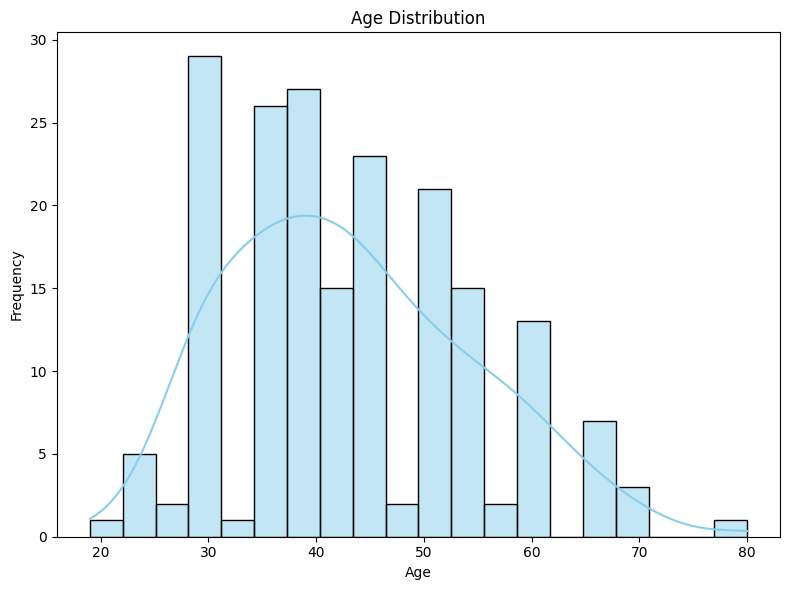

In [13]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Das Alter der Patienten erstreckt sich von 19 bis Mitte 80. Die meisten Patienten befinden sich im Bereich von 30-65 Jahren.

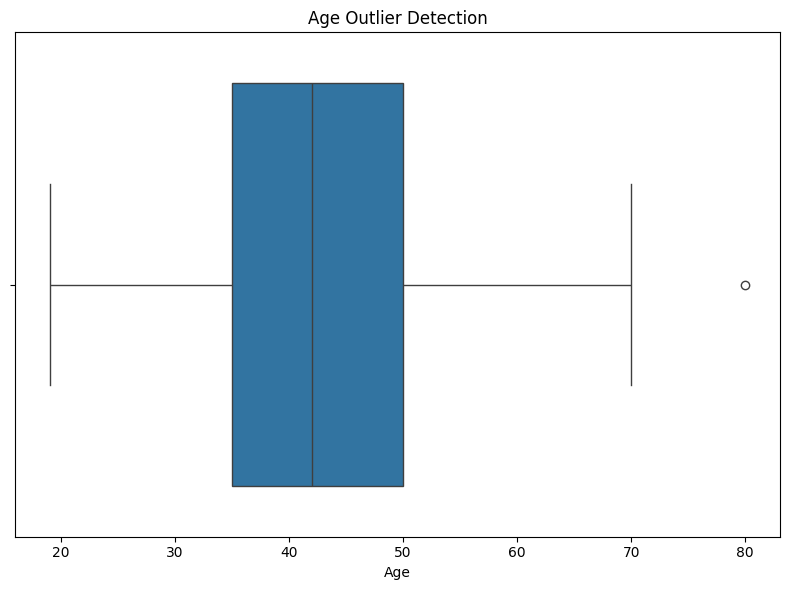

In [14]:
# Boxplot for outlier detection in Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df_cleaned)
plt.title('Age Outlier Detection')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

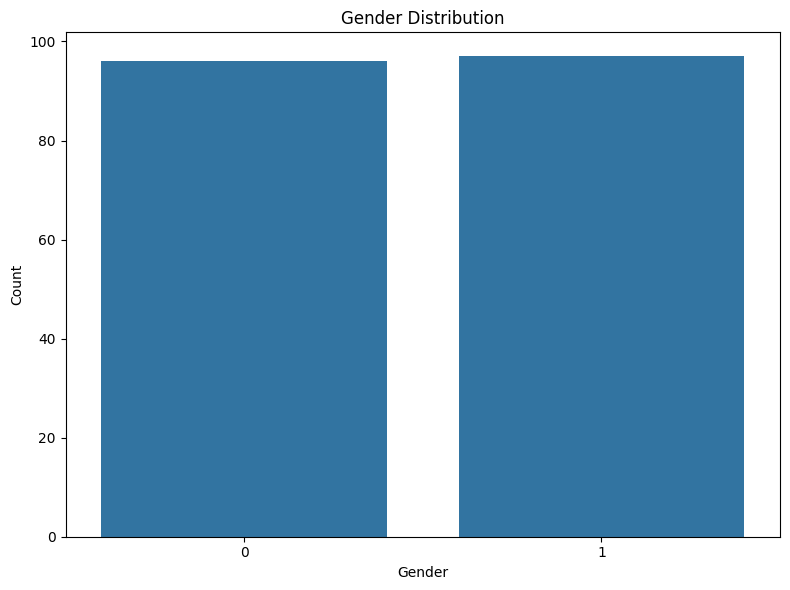

In [15]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

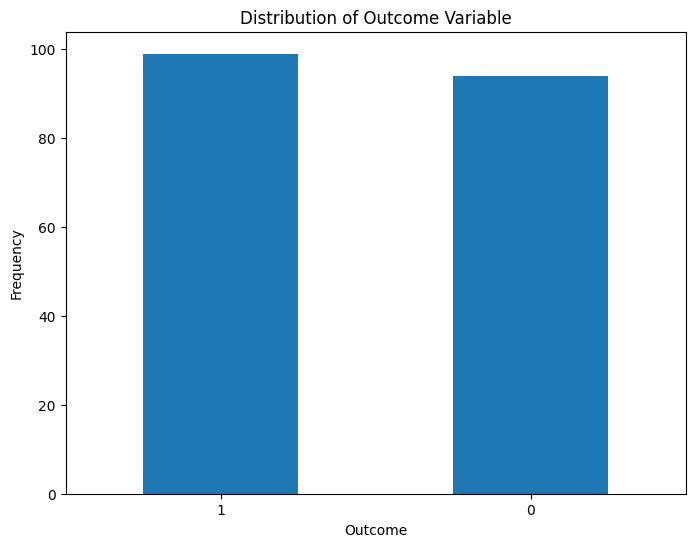

In [16]:
# Visualizing the distribution of the 'Outcome Variable'
plt.figure(figsize=(8, 6))
df_cleaned['Outcome Variable'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Die Geschlechteranzahl der Patienten ist ausgeglichen, es sind fast so viele Frauen wie Männer.

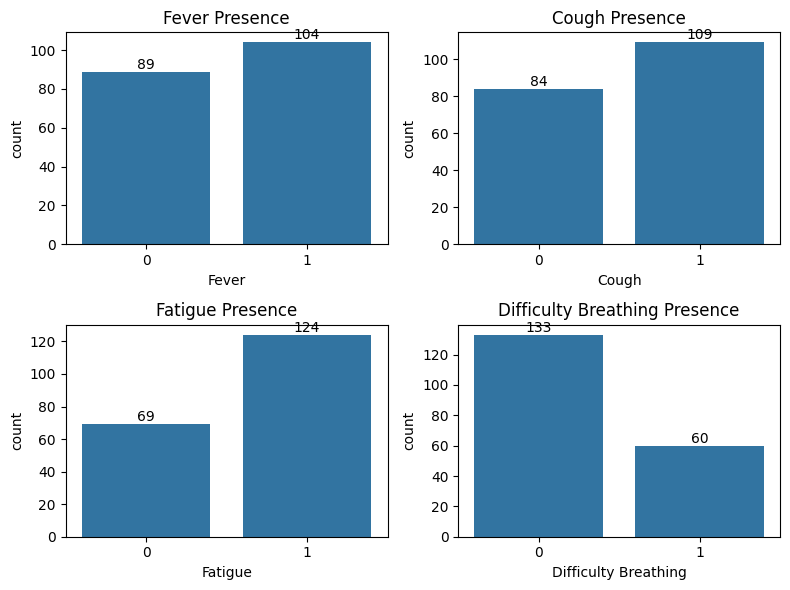

In [17]:
# Symptom presence visualization
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for sym, ax in zip(symptoms, axes.flatten()):
    countplot = sns.countplot(x=sym, data=df_cleaned, ax=ax)
    ax.set_title(f'{sym} Presence')

    # Annotate each bar in the countplot with its height value
    for p in countplot.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

Fieber, Husten und Müdigkeit treten häufiger als Symptom auf, während Atemschwierigkeit häufiger nicht vorhanden ist.

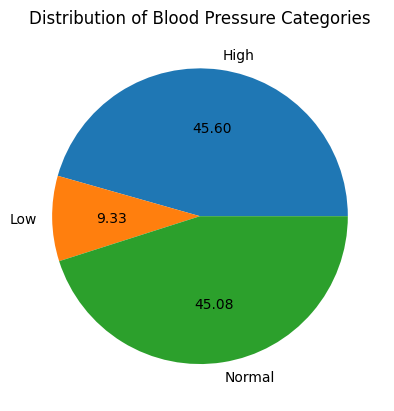

In [18]:
# Plot a pie chart showing the distribution of blood pressure categories among the cleaned data to visualize prevalence.
df_cleaned.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Blood Pressure Categories')  # Adding a title to the pie chart
plt.show()

Der Blutdruck ist in den meisten Fällen normal oder hoch, eher selten ist dieser niedrig.

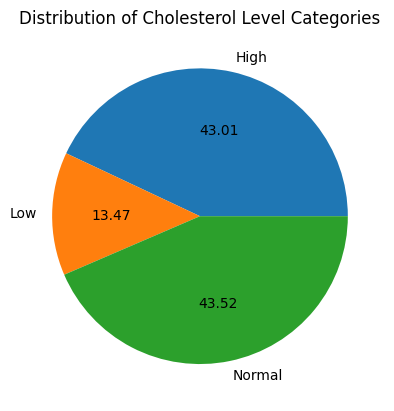

In [19]:
# Plot a pie chart showing the distribution of blood pressure categories among the cleaned data to visualize prevalence.
df_cleaned.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Cholesterol Level Categories')  # Adding a title to the pie chart
plt.show()


Der Cholesterinspiegel ist wie der Blutdruck in den meisten Fällen normal oder hoch und selten niedrig.

/var/folders/vb/3fgx1mm954q9j0shqmng75q00000gn/T/ipykernel_30092/942770833.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)


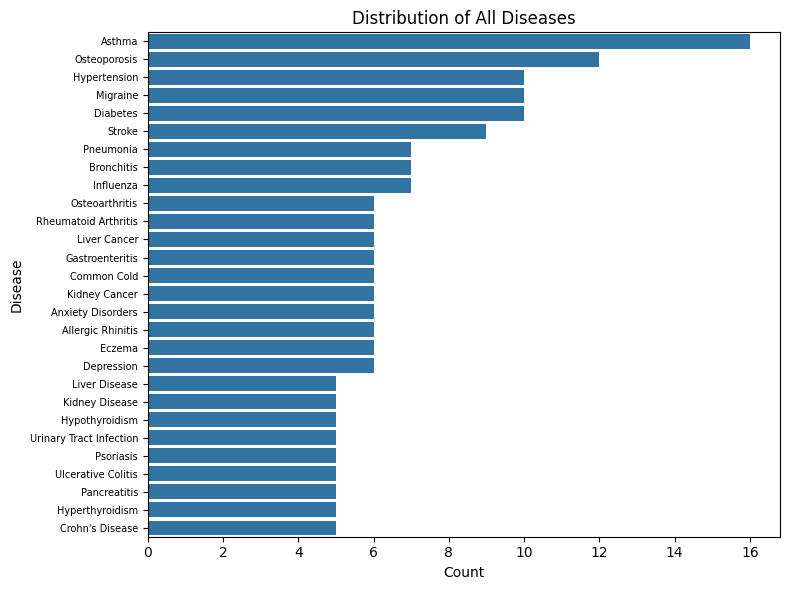

In [20]:
# Count occurrences of each disease
disease_counts = df_cleaned['Disease'].value_counts()

# Visualization of the distribution of all diseases
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='Disease', data=df_cleaned, order=disease_counts.index)
plt.title('Distribution of All Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')

# Adjust the size of the y-axis labels to make them more legible
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)

# Optionally, you can rotate the text if it still doesn't fit well
# ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()

Es werden nur die Krankheiten betrachtet, die mindestens 5 mal vorkommen. Am häufigsten kommen die Krankheiten Asthma, Osteoporosis, Hypertension, Migraine und Diabetes vor.

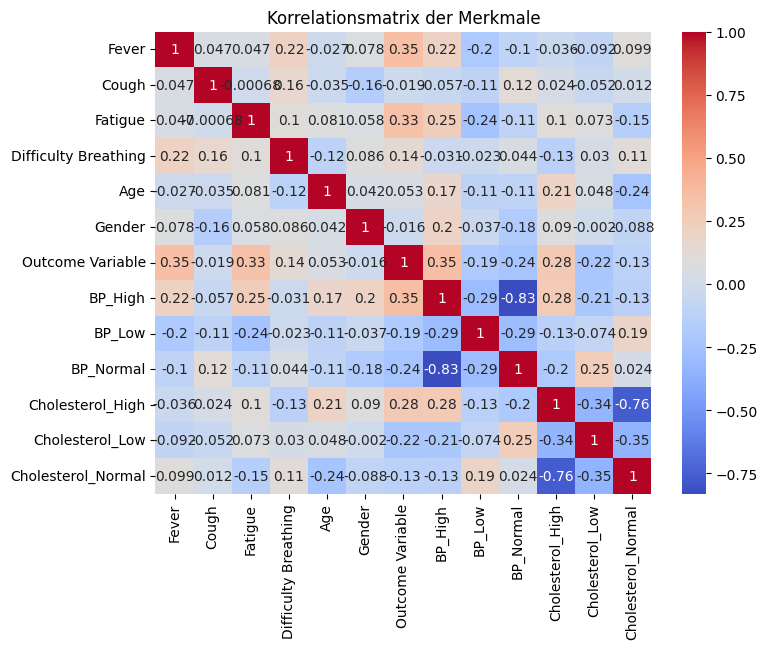

In [21]:
correlation_matrix = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der Merkmale')
plt.show()

Fieber und Outcome Variable: Der Koeffizient von 0.343 zeigt eine moderate positive Korrelation. Das bedeutet, dass ein Anstieg der Fieberfälle tendenziell mit einem positiven Ausgang der Diagnose (Outcome Variable) zusammenhängt.

Müdigkeit und Outcome Variable: Mit einem Koeffizienten von 0.330 gibt es auch hier eine moderate positive Korrelation.

BP_High und Outcome Variable: Die Korrelation von 0.347 deutet darauf hin, dass höherer Blutdruck oft mit einem positiven Diagnoseergebnis korreliert ist.

Merkmale wie Geschlecht und Alter zeigen geringere Korrelationen mit anderen Merkmalen, was darauf hindeutet, dass sie weniger direkte Vorhersagekraft für die betrachteten medizinischen Zustände haben könnten.

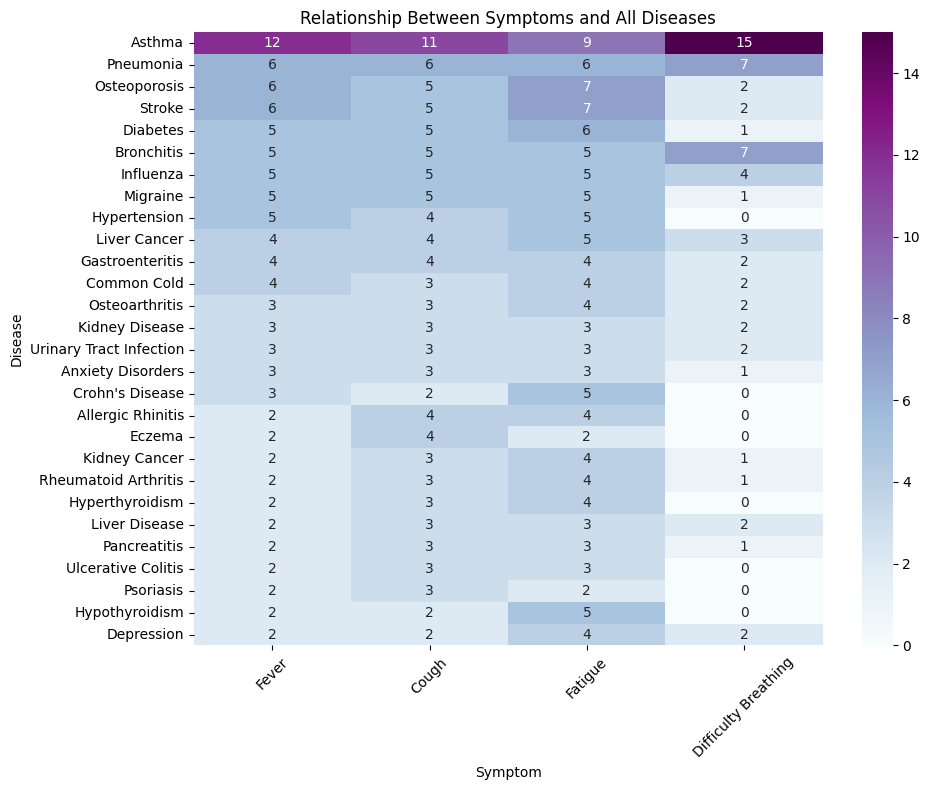

In [22]:
symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

# Analyze the relationship between symptoms and all diseases
symptoms_per_disease = df_cleaned.groupby('Disease')[symptom_columns].sum()

# Ensure the DataFrame for the heatmap is correctly prepared
symptoms_per_disease = symptoms_per_disease.sort_values(by=symptom_columns, ascending=False)  # Sortieren der Krankheiten

# Visualization of the relationship between symptoms and all diseases
plt.figure(figsize=(10, 8))  # Adjusting figure size to accommodate all diseases
sns.heatmap(symptoms_per_disease, annot=True, cmap="BuPu", fmt="d")
plt.title('Relationship Between Symptoms and All Diseases')
plt.ylabel('Disease')
plt.xlabel('Symptom')
plt.xticks(rotation=45)  # Adjust rotation if necessary based on your data
plt.yticks(rotation=0)  # Ensure y-ticks are not rotated
plt.tight_layout()
plt.show()

Asthma: Zum Beispiel zeigte die höchste Anzahl von Patienten mit Asthma Symptome von Atembeschwerden (15 Fälle), gefolgt von Fieber (12 Fälle). Dies spiegelt typische Symptome wider, die mit Asthma verbunden sind, wie Atemprobleme und eventuell begleitendes Fieber.

Pneumonia (Lungenentzündung) und Bronchitis: Beide Krankheiten zeigen ein ähnliches Profil mit einer moderaten Anzahl von Fieber-, Husten- und Atembeschwerdefällen, was auf die Beteiligung der Atemwege hinweist.

Diabetes und Schlaganfall (Stroke): Bei diesen Erkrankungen sind die Symptome weniger mit den Atemwegen und mehr mit allgemeiner Müdigkeit verbunden.

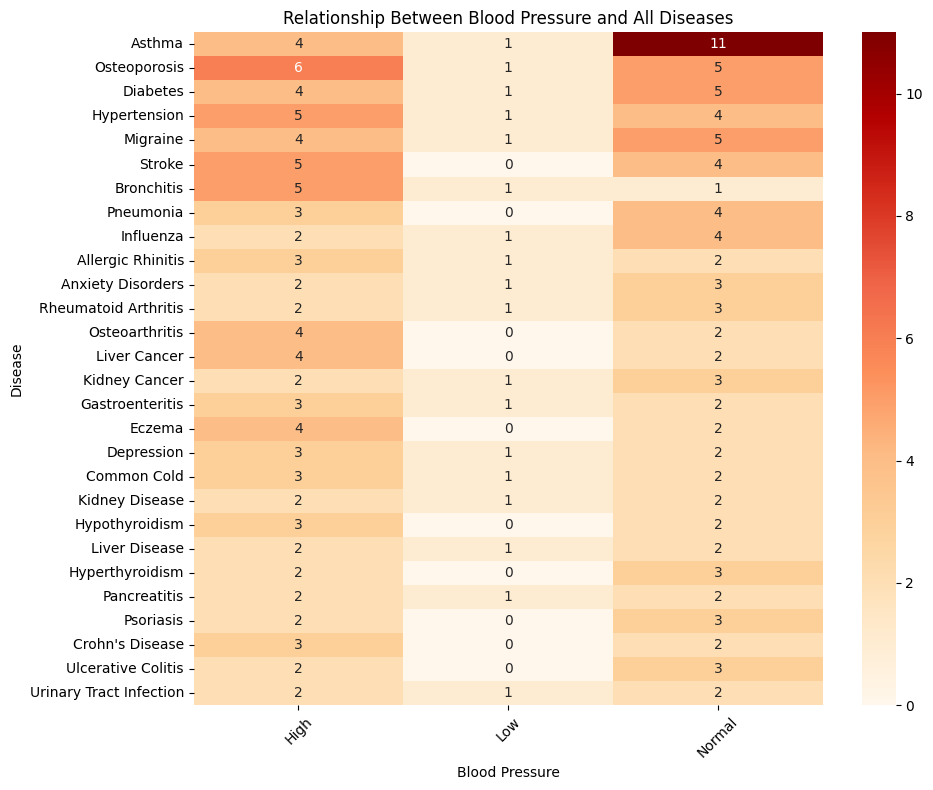

In [23]:
# Analysis of the relationship between blood pressure and all diseases
blood_pressure_disease_relation = df_cleaned.groupby('Disease')['Blood Pressure'].value_counts().unstack(fill_value=0)

# Sort diseases by the sum of their counts across blood pressure categories
sorted_indices = blood_pressure_disease_relation.sum(axis=1).sort_values(ascending=False).index
blood_pressure_disease_relation_sorted = blood_pressure_disease_relation.loc[sorted_indices]

# Visualization of the relationship between blood pressure and all diseases
plt.figure(figsize=(10, 8))
sns.heatmap(blood_pressure_disease_relation_sorted, annot=True, cmap="OrRd", fmt="d")
plt.title('Relationship Between Blood Pressure and All Diseases')
plt.ylabel('Disease')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Asthma: Beispielsweise haben die meisten Asthma-Patienten normale Blutdruckwerte (11 von 16), was darauf hindeutet, dass Asthma weniger Einfluss auf den Blutdruck zu haben scheint.

Osteoporose: Interessanterweise haben Patienten mit Osteoporose häufiger hohen Blutdruck (6 von 12), was auf eine mögliche Verbindung zwischen Osteoporose und kardiovaskulären Risikofaktoren hinweisen könnte.

Diabetes und Hypertonie: Beide Zustände sind bekannt für ihre Beziehung zu abnormalen Blutdruckwerten, was sich auch in dieser Tabelle zeigt, wo ein bedeutender Anteil der Patienten hohen Blutdruck aufweist.

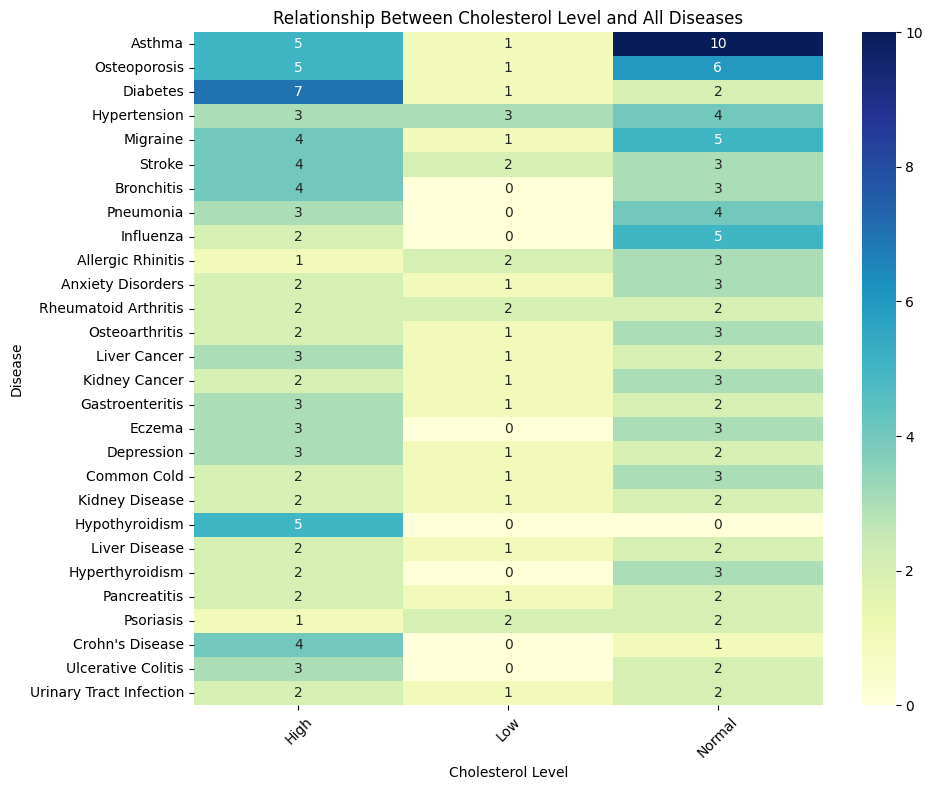

In [24]:
# Analysis of the relationship between cholesterol level and all diseases
cholesterol_disease_relation = df_cleaned.groupby('Disease')['Cholesterol Level'].value_counts().unstack(fill_value=0)

# Sort diseases by the sum of their counts across blood pressure categories
sorted_indices = cholesterol_disease_relation.sum(axis=1).sort_values(ascending=False).index
cholesterol_disease_relation_sorted = cholesterol_disease_relation.loc[sorted_indices]

# Visualization of the relationship between cholesterol level and all diseases
plt.figure(figsize=(10, 8))
sns.heatmap(cholesterol_disease_relation_sorted, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Relationship Between Cholesterol Level and All Diseases')
plt.ylabel('Disease')
plt.xlabel('Cholesterol Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Diabetes: Auffällig ist der hohe Anteil von Patienten mit hohem Cholesterin (7 von 10). Diabetes ist bekannt dafür, dass er oft mit hohen Cholesterinwerten einhergeht, was das Risiko für kardiovaskuläre Erkrankungen erhöht.

Hypothyroidism (Unterfunktion der Schilddrüse): Alle Patienten mit dieser Krankheit haben hohe Cholesterinwerte, was eine direkte Auswirkung der Krankheit auf den Fettstoffwechsel zeigt.

Krankheiten wie Allergic Rhinitis und Psoriasis: Diese zeigen eine gleichmäßigere Verteilung zwischen den Cholesterinspiegel-Kategorien, was darauf hindeutet, dass diese Krankheiten weniger Einfluss auf den Cholesterinspiegel haben könnten.

# Machine Learning

In [25]:
# Remove columns with object type to implement ML model
df_cleaned = df_cleaned.drop(['Blood Pressure', 'Cholesterol Level'], axis=1)
df_cleaned

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Outcome Variable,BP_High,BP_Low,BP_Normal,Cholesterol_High,Cholesterol_Low,Cholesterol_Normal
0,Influenza,1,0,1,1,19,0,1,0,1,0,0,0,1
1,Common Cold,0,1,1,0,25,0,0,0,0,1,0,0,1
2,Eczema,0,1,1,0,25,0,0,0,0,1,0,0,1
3,Asthma,1,1,0,1,25,1,1,0,0,1,0,0,1
4,Eczema,1,0,0,0,25,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Stroke,1,1,1,0,65,0,1,1,0,0,1,0,0
287,Osteoporosis,1,0,0,0,70,1,0,0,0,1,0,0,1
292,Migraine,0,0,1,0,70,0,1,0,0,1,0,0,1
293,Stroke,0,1,0,0,70,1,1,0,0,1,1,0,0


In [26]:
# New Feature Symptom Score
df_cleaned['Symptom Score'] = df_cleaned['Fever'] + df_cleaned['Cough'] + df_cleaned['Fatigue'] + df_cleaned['Difficulty Breathing']

# Train-Test-Split
X = df_cleaned.drop(['Outcome Variable', 'Disease'], axis=1)  # Assuming 'Disease' is not used
y = df_cleaned['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,BP_High,BP_Low,BP_Normal,Cholesterol_High,Cholesterol_Low,Cholesterol_Normal,Symptom Score
0,1,0,1,1,19,0,0,1,0,0,0,1,3
1,0,1,1,0,25,0,0,0,1,0,0,1,2
2,0,1,1,0,25,0,0,0,1,0,0,1,2
3,1,1,0,1,25,1,0,0,1,0,0,1,3
4,1,0,0,0,25,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,1,1,0,65,0,1,0,0,1,0,0,3
287,1,0,0,0,70,1,0,0,1,0,0,1,1
292,0,0,1,0,70,0,0,0,1,0,0,1,1
293,0,1,0,0,70,1,0,0,1,1,0,0,1


Der "Symptom Score" gibt die Gesamtzahl der Symptome an, die ein Patient hat, und bietet eine einfache, quantifizierbare Metrik zur Bewertung der Krankheitsschwere oder -aktivität. Ein höherer Symptom Score könnte auf eine schwerere oder aktivere Krankheit hindeuten und kann als prädiktiver Faktor in Modellen verwendet werden. Anschließend teilt der Code den Datensatz in Trainings- und Testsets auf, wobei er einen bestimmten Prozentsatz der Daten für die unabhängige Überprüfung der Modellleistung reserviert (20%). Diese Aufteilung ist entscheidend für das Trainieren von robusten, generalisierbaren Modellen und ermöglicht es, die Vorhersagefähigkeit des Modells auf bisher unbekannten Daten zu evaluieren.

In [27]:
# Initialize models
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train) 

# Evaluations
accuracy_rf = accuracy_score(y_test, model_rf.predict(X_test))

print(f'Accuracy of Random Forest: {accuracy_rf * 100:.2f}%')

Accuracy of Random Forest: 76.92%


Der Codeabschnitt beschreibt den Prozess der Modellinitialisierung, des Trainings und der Bewertung für ein maschinelles Lernmodell, in diesem Fall ein Random Forest Klassifikator. Der Abschnitt demonstriert, wie ein Modell vorbereitet, auf Basis von Trainingsdaten trainiert und dann mit einem Testdatensatz evaluiert wird. Die berechnete Genauigkeit (76.92%, kann nach jedem Durchlauf des Codes abweichen) gibt an, wie gut das Modell die Datenklassifikation im Vergleich zu den tatsächlichen Labels ausführt. Diese Vorgehensweise ist ein fundamentaler Bestandteil des maschinellen Lernens, der hilft, die Leistungsfähigkeit eines Modells zu verstehen und zu beurteilen.

Der Random Forest Algorithmus ist für dieses Beispiel besonders nützlich, da er robuste Leistungsfähigkeit und Genauigkeit bei der Klassifikation in komplexen Datensätzen bietet. Random Forest, ein Ensemble-Lernverfahren, das auf mehreren Entscheidungsbäumen basiert und ihre Vorhersagen aggregiert, ist effektiv in der Handhabung von großen Datenmengen mit vielen Variablen, wie es oft in medizinischen Datensätzen der Fall ist.

Einer der Hauptvorteile von Random Forest ist seine Fähigkeit, Overfitting zu vermeiden, das bei einzelnen Entscheidungsbäumen häufig auftritt. Dies wird durch die Kombination der Vorhersagen aus vielen Bäumen erreicht, die jeweils auf zufälligen Teilmengen der Trainingsdaten trainiert wurden. Dies erhöht die Generalisierbarkeit des Modells auf neue, unbekannte Daten, was für medizinische Anwendungen kritisch ist, wo die Genauigkeit der Vorhersage potenziell lebensrettende Auswirkungen haben kann.

In [28]:
def evaluate_model(model, X_test, y_test):
    # Model predictions
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für die positive Klasse
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)  # Berechnung der ROC-AUC
    
    # Output metrics
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-Score: {f1 * 100:.2f}%')
    print(f'ROC-AUC: {roc_auc * 100:.2f}%')

print("Metrics for RandomForest:")
evaluate_model(model_rf, X_test, y_test)

Metrics for RandomForest:
Accuracy: 76.92%
Precision: 66.67%
Recall: 71.43%
F1-Score: 68.97%
ROC-AUC: 80.00%


Die Genauigkeit misst den Prozentsatz der Gesamtvorhersagen, die korrekt waren, und gibt damit an, wie oft das Modell insgesamt richtig liegt. Die Präzision bewertet, wie viele der als positiv klassifizierten Fälle tatsächlich positiv sind, was wichtig ist, um die Zuverlässigkeit der positiven Vorhersagen des Modells zu verstehen. Der Recall zeigt, wie viele der tatsächlich positiven Fälle vom Modell erkannt wurden, was in medizinischen oder anderen kritischen Anwendungen essentiell sein kann, um sicherzustellen, dass wenige bis keine positiven Fälle übersehen werden. Der F1-Score, der harmonische Mittelwert von Präzision und Recall, bietet eine einzige Metrik, die beide Aspekte der Leistung in sich vereint, was besonders nützlich ist, wenn ein Ausgleich zwischen Präzision und Recall erreicht werden soll.

In [29]:
# Feature Importance for RandomForest
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Model evaluation
predictions = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

importances

,Feature,Importance
4,Age,0.285430
12,Symptom Score,0.110871
0,Fever,0.094026
2,Fatigue,0.088848
6,BP_High,0.076747
9,Cholesterol_High,0.074463
5,Gender,0.068525
1,Cough,0.041918
8,BP_Normal,0.040366
3,Difficulty Breathing,0.034695


Das Merkmal "Age" steht mit einer Wichtigkeit von etwa 28.54% an der Spitze, was darauf hindeutet, dass das Alter des Patienten ein entscheidender Faktor bei der Vorhersage des Gesundheitszustands ist. Eng verbunden damit ist der "Symptom Score", der eine aggregierte Bewertung der Symptome eines Patienten darstellt und eine Wichtigkeit von ungefähr 11.09% aufweist. Weitere wichtige Merkmale sind "Fever", "Fatigue", "BP_high" und "Cholesterol_High", was die Bedeutung dieser klinischen Indikatoren unterstreicht.

Interessanterweise zeigt die Tabelle auch, dass das Geschlecht des Patienten mit einer Wichtigkeit von etwa 6.85% ebenfalls eine Rolle spielt. Andere Merkmale wie "Cough", "BP_Normal" und "Difficulty Breathing" sind ebenfalls von Bedeutung, allerdings in geringerem Ausmaß.

In [30]:
# Define the parameters you want to search through
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for splitting
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Conduct the search on the training data
grid_search.fit(X_train, y_train)

# Obtain the model with the best parameters
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt

In [31]:
# Output the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


Die besten Hyperparameter für das Random Forest Modell wurden durch GridSearch identifiziert, der die maximale Baumtiefe (max_depth) auf 10 setzte, die Anzahl der Features, die bei jedem Split berücksichtigt werden (max_features), auf die Wurzel der Featureanzahl begrenzte, ein Blattknoten mindestens ein Sample haben muss (min_samples_leaf), mindestens zwei Samples erforderlich sind, um einen internen Knoten zu teilen (min_samples_split), und die Anzahl der Bäume im Wald (n_estimators) auf 400 erhöht wurde. Diese Konfiguration führte zu einer besten erreichten ROC-AUC (Receiver Operating Characteristic - Area Under Curve) von 85,93%, was die Fähigkeit des Modells zeigt, zwischen den Klassen effektiv zu unterscheiden und eine hohe Vorhersagegenauigkeit zu gewährleisten.

Die Leistung des Modells bei der Klassifikation wird durch verschiedene Metriken detailliert dargestellt. Für die Klasse 0 ("negatives Ergebnis") erreicht das Modell eine Präzision, einen Recall und einen F1-Score von jeweils 84%, was eine hohe Übereinstimmung zwischen Vorhersage und tatsächlichem Ergebnis anzeigt. Für die Klasse 1 ("positives Ergebnis") sind die Werte jeweils 71%, was auf eine etwas geringere, aber immer noch robuste Vorhersagegenauigkeit hinweist. Insgesamt erreicht das Modell eine Gesamtgenauigkeit von 79% über beide Klassen. Diese Metriken verdeutlichen, dass das Modell insgesamt eine ausgewogene Leistung zwischen den beiden Klassen zeigt, mit einer etwas stärkeren Vorhersagefähigkeit für die Klasse 0.

In [32]:
# Initialize the RandomForest model with the best hyperparameters
optimized_rf = RandomForestClassifier(
    max_depth=10,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=400,
    random_state=42
)

# Train the model with the training data
optimized_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_optimized = optimized_rf.predict(X_test)
y_probs_optimized = optimized_rf.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für die positive Klasse

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
roc_auc = roc_auc_score(y_test, y_probs_optimized)  # Berechnung der ROC-AUC

# Output metrics
print("Optimized RandomForest Model")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-Score: {f1 * 100:.2f}%')
print(f'ROC-AUC: {roc_auc * 100:.2f}%')

Optimized RandomForest Model
Accuracy: 79.49%
Precision: 71.43%
Recall: 71.43%
F1-Score: 71.43%
ROC-AUC: 81.43%


Das optimierte Random Forest Modell zeigt eine Genauigkeit von 79,49%, eine Präzision von 71,43%, einen Recall von ebenfalls 71,43% und einen F1-Score von 71,43%. Diese Ergebnisse stellen eine Verbesserung gegenüber dem ursprünglichen Modell dar, welches eine Genauigkeit von 76,92%, eine Präzision von 66,67%, einen Recall von 71,43% und einen F1-Score von 68,97% erreichte. Die Steigerung der Genauigkeit und Präzision deutet darauf hin, dass das optimierte Modell in der Lage ist, die positiven Fälle genauer zu identifizieren und dabei weniger Fehler zu machen. Die Konstanz beim Recall bedeutet, dass das Modell weiterhin einen hohen Anteil der tatsächlichen positiven Fälle korrekt identifiziert. Diese Verbesserungen könnten durch die Anpassung der Hyperparameter wie maximale Tiefe der Bäume, Anzahl der Features für das Splitting und die Anzahl der Bäume im Modell erreicht worden sein.

In [33]:
# Classification report
y_pred_optimized = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.71      0.71      0.71        14

    accuracy                           0.79        39
   macro avg       0.78      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39



In [34]:
# Berechne die ROC-Kurve und AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs_optimized)
roc_auc = auc(fpr, tpr)

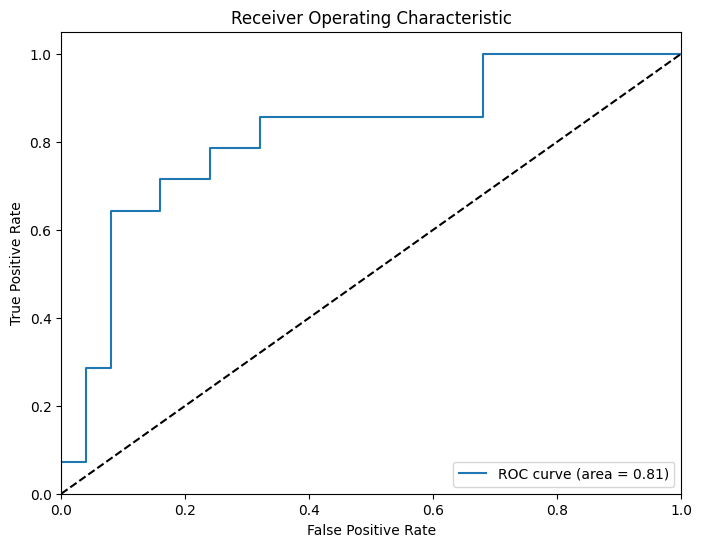

In [35]:
# Visualisiere die ROC-Kurve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

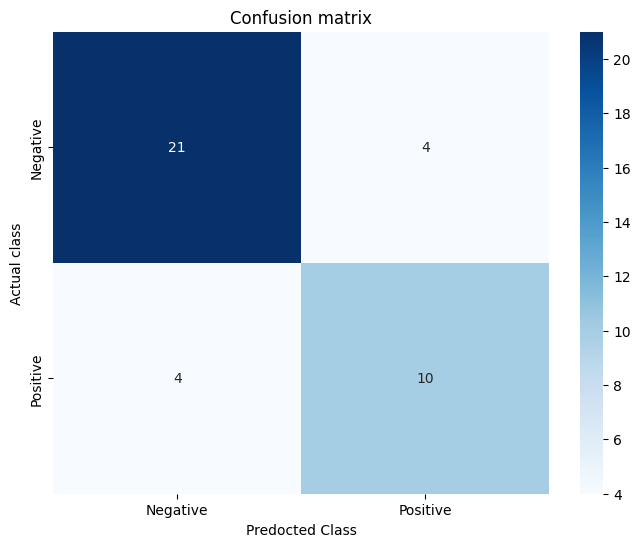

In [36]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predocted Class')
plt.show()


Die Konfusionsmatrix zeigt die Leistung des Modells bei der Klassifikation von Testdaten nach der Anpassung des Schwellenwerts. Aus der Matrix ist ersichtlich, dass das Modell 23 wahre Negative (keine Erkrankung korrekt identifiziert) und 9 wahre Positive (korrekt identifizierte Erkrankungen) korrekt vorhergesagt hat. Es gab jedoch auch 2 falsch positive Fälle (fälschlicherweise als Erkrankung klassifiziert) und 5 falsch negative Fälle (Erkrankung nicht erkannt). Diese Zahlen spiegeln die zuvor diskutierten Präzisions- und Recall-Werte wider und verdeutlichen, wie der angepasste Schwellenwert zur Reduktion von Fehlern beiträgt, insbesondere zur Minimierung von falsch positiven Ergebnissen, was in vielen klinischen Szenarien als kritisch angesehen wird.

# Vorhersage-Demo

In [37]:
def predict_random_sample(optimized_rf, X_test, y_test, full_data):
    # Zufälligen Index aus dem Testdatensatz wählen
    random_index = random.randint(0, len(X_test) - 1)
    sample_features = X_test.iloc[random_index]
    sample_target = y_test.iloc[random_index]
    sample_disease = full_data.loc[sample_features.name, 'Disease']  # Zugriff auf die 'Disease' Spalte über den Index

    # Umformen für eine einzelne Vorhersage
    sample_features_reshaped = sample_features.values.reshape(1, -1)

    # Vorhersage durchführen
    prediction = optimized_rf.predict(sample_features_reshaped)[0]

    # Tatsächliche und vorhergesagte Ergebnisse anzeigen
    print(f"Zufällig gewählter Datenpunkt Index: {sample_features.name}")
    print(f"Tatsächliche Disease: {sample_disease}")
    print(f"Tatsächliche Outcome Variable: {sample_target}")
    print(f"Vorhergesagte Outcome Variable: {prediction}")

# Beispielaufruf der Funktion
predict_random_sample(optimized_rf, X_test, y_test, df_cleaned)

Zufällig gewählter Datenpunkt Index: 189
Tatsächliche Disease: Hypertension
Tatsächliche Outcome Variable: 0
Vorhergesagte Outcome Variable: 0


/Users/laurenziubiemel/Documents/DataExploration/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
# Initialisieren des Dummy-Classifiers
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)

# Training des Dummy-Classifiers
dummy_clf.fit(X_train, y_train)

# Vorhersagen auf den Testdaten machen
y_pred_dummy = dummy_clf.predict(X_test)
y_probs_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für die positive Klasse

# Bewertung des Dummy-Classifiers
print("Dummy Classifier Metrics:")
print(classification_report(y_test, y_pred_dummy))
roc_auc_dummy = roc_auc_score(y_test, y_probs_dummy)  # Berechnung der ROC-AUC für Dummy-Classifier
print(f'ROC-AUC: {roc_auc_dummy * 100:.2f}%')

Dummy Classifier Metrics:
              precision    recall  f1-score   support

           0       0.53      0.40      0.45        25
           1       0.25      0.36      0.29        14

    accuracy                           0.38        39
   macro avg       0.39      0.38      0.37        39
weighted avg       0.43      0.38      0.40        39

ROC-AUC: 50.00%


In [39]:
# Bewertung des optimierten Random-Forest-Modells zum Vergleich
y_pred_rf = optimized_rf.predict(X_test)
print("Optimized RandomForest Model Metrics:")
print(classification_report(y_test, y_pred_rf))

Optimized RandomForest Model Metrics:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.71      0.71      0.71        14

    accuracy                           0.79        39
   macro avg       0.78      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39



Modellbewertung, indem er Vorhersagen auf der Basis einer gleichmäßigen Zufallsverteilung trifft. Dies bedeutet, dass er Klassenlabels ohne Berücksichtigung der Eingabedaten oder irgendeiner inhärenten Logik zufällig zuweist, wobei jede Klasse die gleiche Wahrscheinlichkeit der Auswahl hat. Der Hauptzweck eines solchen Modells liegt darin, eine Basislinie zu setzen, gegen die man die Leistung eines tatsächlich trainierten Modells messen kann.

Im Vergleich dazu nutzt der optimierte Random-Forest-Classifier tatsächliche Datenmuster und lernt aus den Beziehungen zwischen den Features und den Zielvariablen, um fundiertere und genaue Vorhersagen zu treffen. Die Ergebnisse zeigen deutlich, dass der Random-Forest-Classifier mit einer Genauigkeit von 79% signifikant besser abschneidet als der Dummy Classifier, der nur eine Genauigkeit von 38% erreicht. Auch in den anderen Metriken wie Präzision, Recall und F1-Score übertrifft der Random-Forest-Classifier den Dummy Classifier um ein Vielfaches. Während der Dummy Classifier Klassenlabels zufällig zuweist und dabei eine geringe Effektivität zeigt, demonstriert der Random-Forest-Classifier seine Fähigkeit, relevante Muster zu erkennen und präzise Vorhersagen zu treffen, was ihn zu einem weit überlegenen Werkzeug für die Klassifizierung macht.